<h1><b>Tiền xử lý dữ liệu</b></h1>



***import***

In [102]:
import pandas 
import json 
import os
import numpy as np
import pandas as pd

***Hàm xử lý***: xử lý data chuyển dict quote thành list dict riêng

In [103]:
def xuly(quotes):
    value={}
    for i in quotes:
        if(i=='quote'):continue
        value[i]=quotes[i]
    tmp= quotes['quote']
    for j in tmp:
        value[j]=tmp[j]
    return value
def xuly_data(listquotes):
    value=[]
    for i in listquotes:
        value.append(xuly(i))
    return value
        
        

***Hàm get address data***

In [104]:
def get_address_data(path_to_year):
    #path_to_year='./data/historical-data'
    list_path_to_year=[path_to_year+'/'+path+'/'+'coin-id-1' for path in os.listdir(path_to_year)]
    list_path=[]
    for i in list_path_to_year:
        for path in os.listdir(i):
            if path.endswith('.json'):
                list_path.append(i+'/'+path)
    return list_path


***Get data***

In [105]:
def getQuotes(path_to_year):
    data_coin_history_by_id=[]
    list_path=get_address_data(path_to_year)
    for i in list_path:
        data_tmp=json.load(open(i,'r'))
        if(len(data_tmp['quotes'])!=0):data_coin_history_by_id+=(data_tmp['quotes'])
    return data_coin_history_by_id


***Hàm xử lý ngày giờ***: hàm chuyển ngày giờ thành giờ hoặc ngày tùy từng thuộc tính của từng cột 

In [106]:
def xyly_ngay_gio_to_gio(object):
    tmp=object.split('T')[1]
    return tmp[0:8]
def xyly_ngay_gio_to_ngay(object):
    tmp=object.split('T')[0]
    return tmp


***Hàm xử lý data fit mô hình***

In [107]:
#xuly_data(data_coin_history_by_id)
def getData(path_to_year):
    data_coin_history_by_id=getQuotes(path_to_year)
    data_=pandas.DataFrame(xuly_data(data_coin_history_by_id))
    for i in data_.keys():
        data_=data_[data_[i]!=0]

    del data_['timeOpen']
    del data_['timeClose']
    data_['date']=''
    data_["timeHigh"] = data_["timeHigh"].apply(xyly_ngay_gio_to_gio)
    data_["timeLow"] = data_["timeLow"].apply(xyly_ngay_gio_to_gio)
    data_["date"] = data_["timestamp"].apply(xyly_ngay_gio_to_ngay)
    del data_['timestamp']
    return data_
path1='./data/historical-data'
data_train=getData(path1)
path_2022="./bitcoin-2022-historical-data/bitcoin-2022-historical-data/"
data_2022=getData(path_2022)



In [108]:
data=[data_train,data_2022]
data=pd.concat(data)
data

,timeHigh,timeLow,open,high,low,close,volume,marketCap,date
243,00:51:02,19:11:01,763.280029,777.510010,713.599976,735.070007,4.686270e+07,8.955395e+09,2013-12-27
244,12:06:01,18:11:01,737.979980,747.059998,705.349976,727.830017,3.250580e+07,8.869919e+09,2013-12-28
245,21:46:02,04:41:01,728.049988,748.609985,714.440002,745.049988,1.901130e+07,9.082104e+09,2013-12-29
246,20:46:02,00:51:01,741.349976,766.599976,740.239990,756.130005,2.070770e+07,9.217168e+09,2013-12-30
247,00:56:02,04:26:02,760.320007,760.580017,738.169983,754.010010,2.089730e+07,9.191325e+09,2013-12-31
...,...,...,...,...,...,...,...,...,...
331,00:28:00,16:22:00,16440.222088,16482.933543,16054.530215,16217.322468,2.774303e+10,3.116864e+11,2022-11-28
332,11:25:00,00:20:00,16217.639904,16522.257471,16139.396275,16444.983270,2.358169e+10,3.160749e+11,2022-11-29
333,23:46:00,00:00:00,16445.477489,17190.938273,16445.477489,17168.565548,2.952358e+10,3.299976e+11,2022-11-30
334,13:35:00,21:10:00,17168.002138,17197.497253,16888.387888,16967.133667,2.289539e+10,3.261421e+11,2022-12-01


### MACHINE LEARNING

***IMPORT LIBRARY***

In [109]:
!pip install sklearn
!pip install tensorflow


In [110]:
import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM


# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [111]:
data.shape

(3263, 9)

In [112]:
data.head()

,timeHigh,timeLow,open,high,low,close,volume,marketCap,date
243,00:51:02,19:11:01,763.280029,777.510010,713.599976,735.070007,46862700.0,8.955395e+09,2013-12-27
244,12:06:01,18:11:01,737.979980,747.059998,705.349976,727.830017,32505800.0,8.869919e+09,2013-12-28
245,21:46:02,04:41:01,728.049988,748.609985,714.440002,745.049988,19011300.0,9.082104e+09,2013-12-29
246,20:46:02,00:51:01,741.349976,766.599976,740.239990,756.130005,20707700.0,9.217168e+09,2013-12-30
247,00:56:02,04:26:02,760.320007,760.580017,738.169983,754.010010,20897300.0,9.191325e+09,2013-12-31


In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3263 entries, 243 to 335
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timeHigh   3263 non-null   object 
 1   timeLow    3263 non-null   object 
 2   open       3263 non-null   float64
 3   high       3263 non-null   float64
 4   low        3263 non-null   float64
 5   close      3263 non-null   float64
 6   volume     3263 non-null   float64
 7   marketCap  3263 non-null   float64
 8   date       3263 non-null   object 
dtypes: float64(6), object(3)
memory usage: 254.9+ KB


In [114]:
data.describe()

,open,high,low,close,volume,marketCap
count,3263.000000,3263.000000,3263.000000,3263.000000,3.263000e+03,3.263000e+03
mean,11830.017247,12130.702946,11493.220072,11833.622656,1.501094e+10,2.185810e+11
std,15943.726960,16352.347319,15471.280593,15939.388454,1.974185e+10,3.013177e+11
min,176.897003,211.731003,171.509995,178.102997,2.857830e+06,2.444379e+09
25%,600.776489,607.363007,588.419006,600.494507,6.114165e+07,8.207928e+09
50%,6351.240000,6470.430176,6259.810000,6359.490000,5.154990e+09,1.098409e+11
75%,12486.150428,13137.297810,11819.847941,12698.751065,2.627770e+10,2.226706e+11
max,67549.735581,68789.625939,66382.061008,67566.830088,3.509679e+11,1.274831e+12


***CHECK NULL***

In [115]:
print('Null Values:',data.isnull().values.sum())

Null Values: 0


In [116]:
## Chuẩn bị data train
## Train nhiều năm
closedf = data[['date','close']]
fig = px.line(closedf, x=closedf.date, y=closedf.close,labels={'date':'date','close':'close'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Bitcoin close price 2014-2022', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [117]:
#Lấy từ 2021 để train
closedf = closedf[closedf['date']>='2021-01-01']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape)

Total data for prediction:  (701, 2)


In [118]:
close_stock

,date,close
2805,2021-01-01,29374.151889
2806,2021-01-02,32127.267939
2807,2021-01-03,32782.024466
2808,2021-01-04,31971.913522
2809,2021-01-05,33992.429344
...,...,...
331,2022-11-28,16217.322468
332,2022-11-29,16444.983270
333,2022-11-30,17168.565548
334,2022-12-01,16967.133667


In [119]:
fig = px.line(closedf, x=closedf.date, y=closedf.close,labels={'date':'date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Bitcoin close price', 
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [120]:
# deleting date column and normalizing using MinMax Scaler

del closedf['date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(701, 1)


In [121]:
# we keep the training set as 60% and 40% testing set

training_size=int(len(closedf)*0.8)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (560, 1)
test_data:  (141, 1)


In [122]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (544, 15)
y_train:  (544,)
X_test:  (125, 15)
y_test (125,)
X_train:  (544, 15, 1)
X_test:  (125, 15, 1)


In [123]:
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

In [124]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
17/17 [==============================] - 1s 12ms/step - loss: 0.2261 - val_loss: 0.0015
Epoch 2/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1270 - val_loss: 0.0017
Epoch 3/200
17/17 [==============================] - 0s 3ms/step - loss: 0.0557 - val_loss: 0.0086
Epoch 4/200
17/17 [==============================] - 0s 3ms/step - loss: 0.0119 - val_loss: 0.0194
Epoch 5/200
17/17 [==============================] - 0s 3ms/step - loss: 0.0051 - val_loss: 0.0116
Epoch 6/200
17/17 [==============================] - 0s 3ms/step - loss: 0.0043 - val_loss: 0.0070
Epoch 7/200
17/17 [==============================] - 0s 3ms/step - loss: 0.0034 - val_loss: 0.0040
Epoch 8/200
17/17 [==============================] - 0s 3ms/step - loss: 0.0031 - val_loss: 0.0027
Epoch 9/200
17/17 [==============================] - 0s 3ms/step - loss: 0.0030 - val_loss: 0.0018
Epoch 10/200
17/17 [==============================] - 0s 4ms/step - loss: 0.0028 - val_loss: 0.0014
Epoch 11

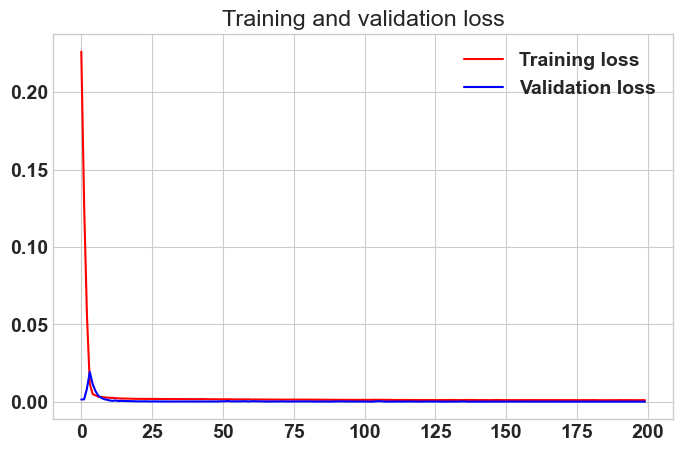

<Figure size 800x500 with 0 Axes>

In [125]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [126]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

4/4 [==============================] - 0s 1ms/step


((544, 1), (125, 1))

In [127]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [128]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  1734.7606290387648
Train data MSE:  3009394.4400629713
Train data MAE:  1282.570582418262
-------------------------------------------------------------------------------------
Test data RMSE:  689.8967249959279
Test data MSE:  475957.49116010696
Test data MAE:  445.92820744358085


In [129]:
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9749955704209794
Test data explained variance regression score: 0.9022136383349586


In [130]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9745360890358418
Test data R2 score: 0.8983628929354786


In [131]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.0016549671506548454
Test data MGD:  0.0011897681986010973
----------------------------------------------------------------------
Train data MPD:  68.43594123752335
Test data MPD:  23.68663709844585


In [133]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['date'],
                       'original_close': close_stock['close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (701, 1)
Test predicted data:  (701, 1)


In [ ]:
#Mạng hồi quy RNN: Recurrent neural network
#RNN là gì: Con người không bắt đầu suy nghĩ của họ từ đầu tại tất cả các điểm mà hiểu ở điểm này từ các điểm trước đó. Tức là tư duy đã có bộ nhớ
#để lưu lại những gì xảy ra trước đó.
# -> Mô hình mạng truyền thống không làm được (đây là khuyết điểm).
#Mạng hồi quy RNN giải quyết vấn đề đó và mạng này có vòng lặp lưu được thông tin. Tuy nhiên RNN chỉ đoán được thông tin ở khoảng cách nhỏ
# Ví dụ: "Các đám mây trên bầu " là đủ biết chữ tiếp theo sẽ là trời.
# Tuy nhiên trong nhiều tình huống thì cần phải sử dụng nhiều ngữ cảnh hơn để suy luận.
# Ví dụ là "I grew up in France... I speak fluently French" rõ ràng các thông tin gần là "I speak fluently" chỉ cho ta biết đằng sau nó sẽ là tên một
# ngôn ngữ nào đó muốn biết nó là ngôn ngữ gì thì cần phải có thêm ngữ cảnh "I grew up in France" và thông tin này có thể nằm ở xa nên RNN không thể
# học được nữa.


#Mạng hồi quy LSTM (long sort term memory networks): là 1 dạng đặc biệt của RNN, và có khả năng học được từ các phụ thuộc xa

***Read testing data***

***Model***

In [ ]:
### VIỆC CẦN LÀM:
# Mô hình bằng các thuật toán hồi quy, phân lớp,... Phân tích và chọn những đặc trưng có mức độ liên quan cao cho bài toán xem xét.

# Đánh giá mô hình: 
# Chọn 2 mô hình để so sánh
# Xác thực kỹ lưỡng siêu tham  số của mô hình validation set or cross validation và quá trình báo cáo tinh chỉnh fine tuning process
# Đánh giá hiệu suất accuracy, precision, recall  MSE, RMSE
# Kết quả cho thấy, trong các mô hình hồi quy Logistic, LDA, QDA, và KNN: mô hình KNN(10) có độ chính xác dự báo tốt nhất.

## LINEAR REGRESSTION ##

***Library***

***Data***